In [ ]:
pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=1e1d6b590d80c87b47c2e0eb32769f3734f04a171bb219e17a0cd03fd6de91c9
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
pip install yfinance

In [ ]:
import numpy as np
import pandas_ta as ta
import yfinance as yf
import pandas as pd
import pandas_datareader.data as web
from datetime import date
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
yf.pdr_override()

# Getting data of stocks

Backtested for 10years

In [ ]:
#NS means stock data of tatamotors listed on NSE
stocksymbol=['TATAMOTORS.NS']
startdate='2013-01-01'
end_date=date.today()
def myportfolio(stock,start=startdate,end=end_date):
  stockdf=web.get_data_yahoo(stock,start=start,end=end,interval='1d')
  return stockdf

In [ ]:
df=myportfolio(stocksymbol)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,312.646545,314.922150,311.162476,313.388580,308.856659,3980484
2013-01-02,315.120026,317.544037,312.893890,314.625336,310.075531,6929285
2013-01-03,316.604095,318.335541,313.784363,314.724274,310.173065,6165017
2013-01-04,315.120026,315.120026,309.876282,312.052917,307.540344,8965650
2013-01-07,314.427460,315.218964,309.282623,309.925751,305.443939,4943021
...,...,...,...,...,...,...
2023-10-30,643.799988,643.799988,621.849976,628.500000,628.500000,12786883
2023-10-31,642.000000,642.000000,627.299988,628.650024,628.650024,11395766
2023-11-01,630.000000,633.799988,626.299988,627.700012,627.700012,8785264


Visualtisation between closing price and date

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2676 entries, 2013-01-01 to 2023-11-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2676 non-null   float64
 1   High       2676 non-null   float64
 2   Low        2676 non-null   float64
 3   Close      2676 non-null   float64
 4   Adj Close  2676 non-null   float64
 5   Volume     2676 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 146.3 KB


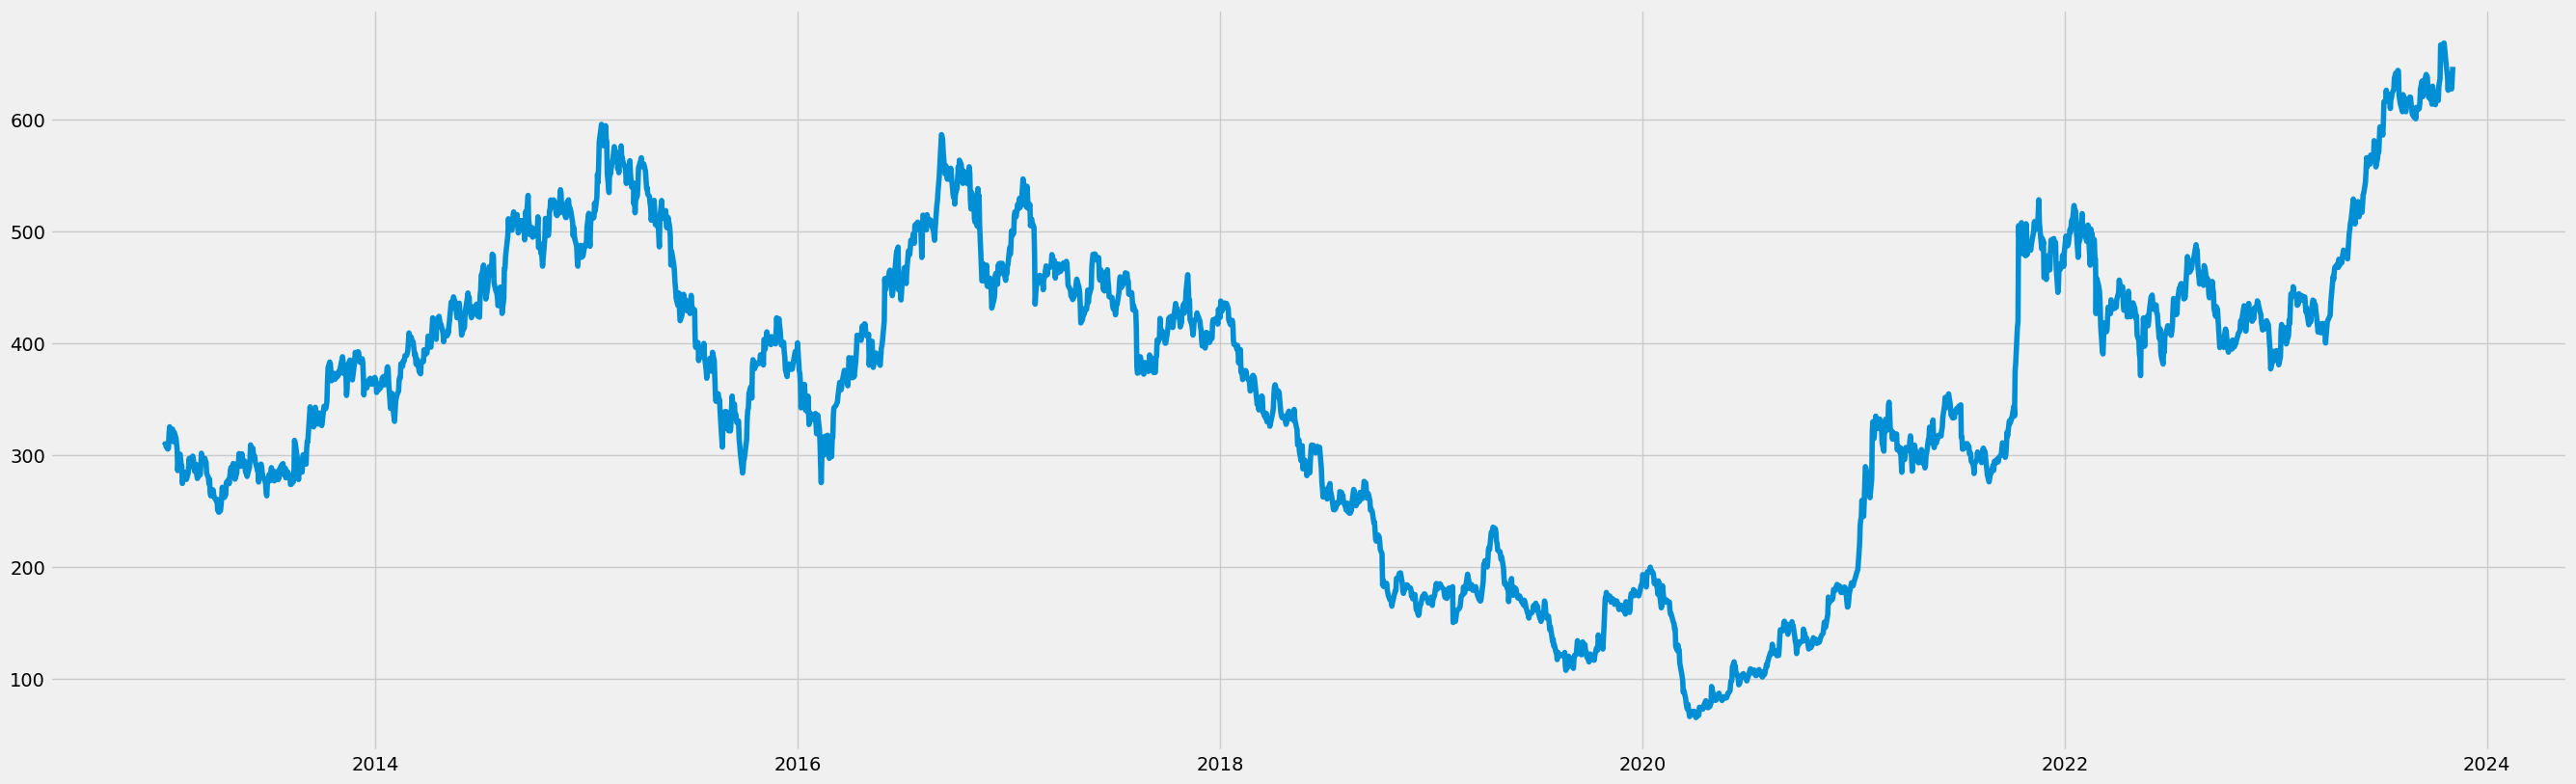

In [ ]:
plt.figure(figsize=(30,9.5))
plt.plot(df['Adj Close'])
plt.show()

Exponential Moving Average

In [ ]:
df['Adj_Close']=df['Adj Close']

In [ ]:
def EMA(df):
  df['EMA26']=df['Adj Close'].ewm(span=26).mean()
  df['EMA12']=df['Adj Close'].ewm(span=12).mean()
  df['MACD']=df['EMA26']-df['EMA12']
  df['signal']=df['MACD'].ewm(span=9).mean()

Simple Moving Average

In [ ]:
window_size=9
df['SMA']=df['Adj Close'].rolling(window_size).mean()
df['EMA9']=df['Adj Close'].ewm(span=9).mean()

In [ ]:
EMA(df)

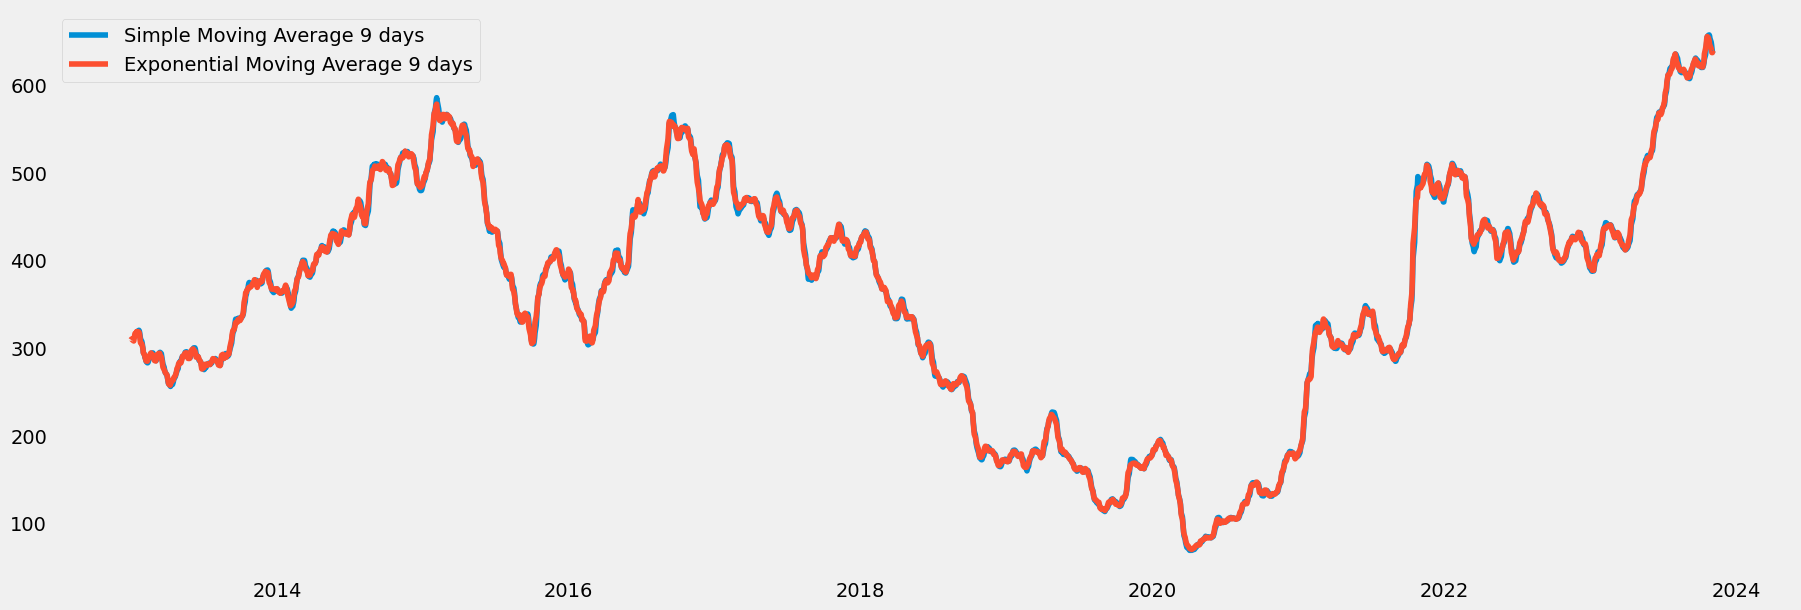

In [ ]:
plt.figure(figsize=(20,7))
plt.grid(False)
plt.plot(df['SMA'],label="Simple Moving Average 9 days")
plt.plot(df['EMA9'],label="Exponential Moving Average 9 days")
plt.legend()
plt.show()


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Adj_Close,SMA,EMA9,EMA26,EMA12,MACD,signal
Date,,,,,,,,,,,,,
2013-01-01,312.646545,314.922150,311.162476,313.388580,308.856659,3980484,308.856659,NaN,308.856659,308.856659,308.856659,0.000000,0.000000
2013-01-02,315.120026,317.544037,312.893890,314.625336,310.075531,6929285,310.075531,NaN,309.533810,309.489535,309.516881,-0.027346,-0.015192
2013-01-03,316.604095,318.335541,313.784363,314.724274,310.173065,6165017,310.173065,NaN,309.795800,309.735121,309.772990,-0.037869,-0.024486
2013-01-04,315.120026,315.120026,309.876282,312.052917,307.540344,8965650,307.540344,NaN,309.031757,309.121557,309.068231,0.053326,0.001873
2013-01-07,314.427460,315.218964,309.282623,309.925751,305.443939,4943021,305.443939,NaN,307.964462,308.268702,308.083524,0.185178,0.056402
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,643.799988,643.799988,621.849976,628.500000,628.500000,12786883,628.500000,648.611104,641.460426,637.678206,641.891137,-4.212931,-7.141362
2023-10-31,642.000000,642.000000,627.299988,628.650024,628.650024,11395766,628.650024,645.605550,638.898345,637.009452,639.854043,-2.844591,-6.282008
2023-11-01,630.000000,633.799988,626.299988,627.700012,627.700012,8785264,627.700012,641.072218,636.658679,636.319864,637.984192,-1.664328,-5.358472


plotting MACD and Signal line

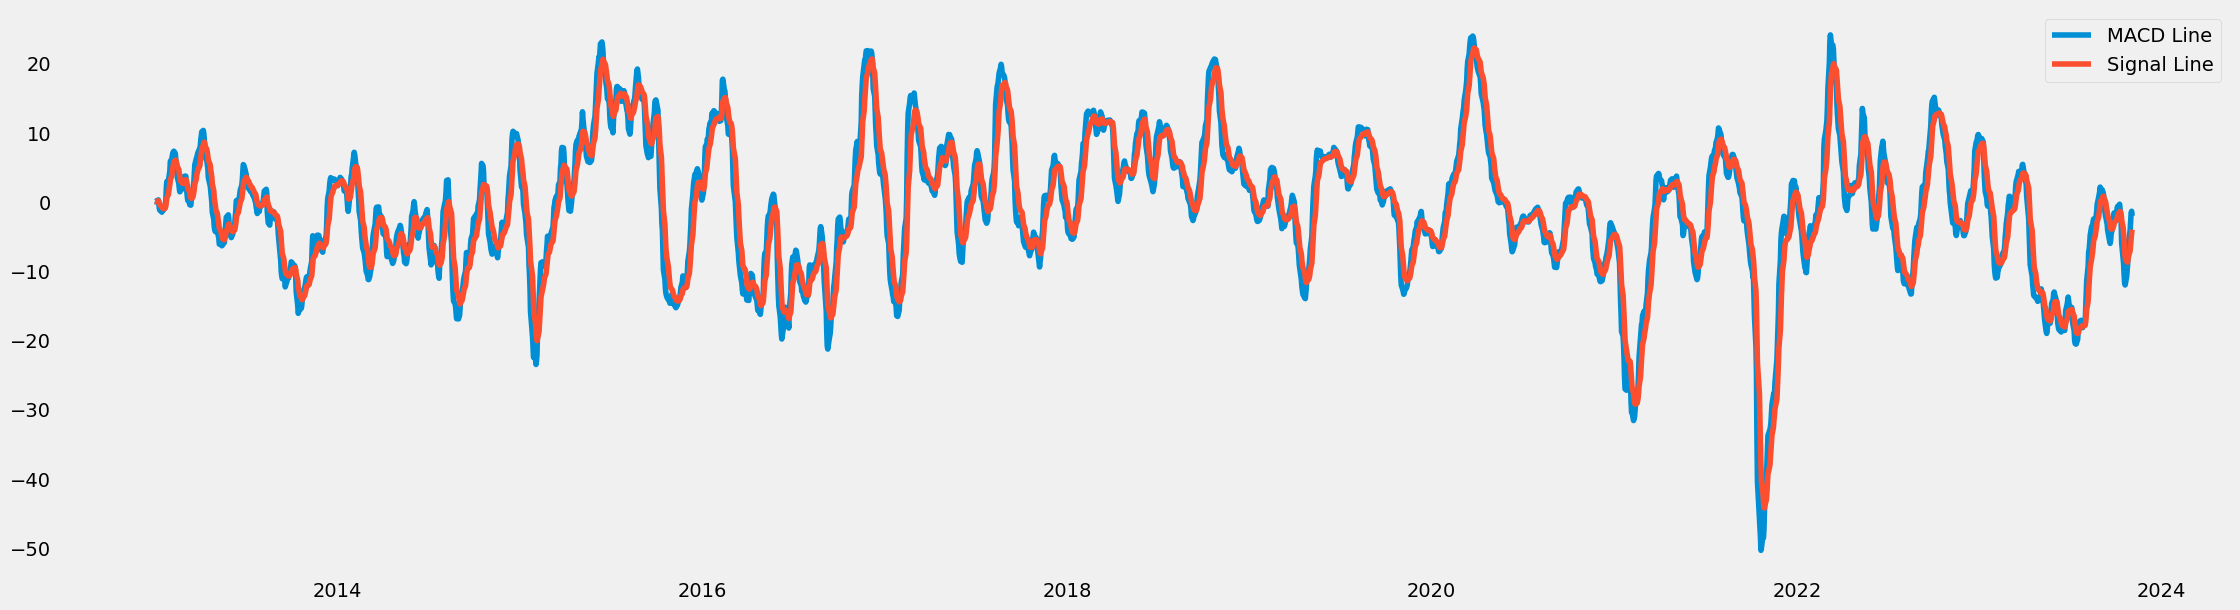

In [ ]:
plt.figure(figsize=(25,7))
plt.grid(False)
plt.plot(df['MACD'],label="MACD Line")
plt.plot(df['signal'],label="Signal Line")
plt.legend()
plt.show()

Histogram for the MACD Strategy (Momentum)



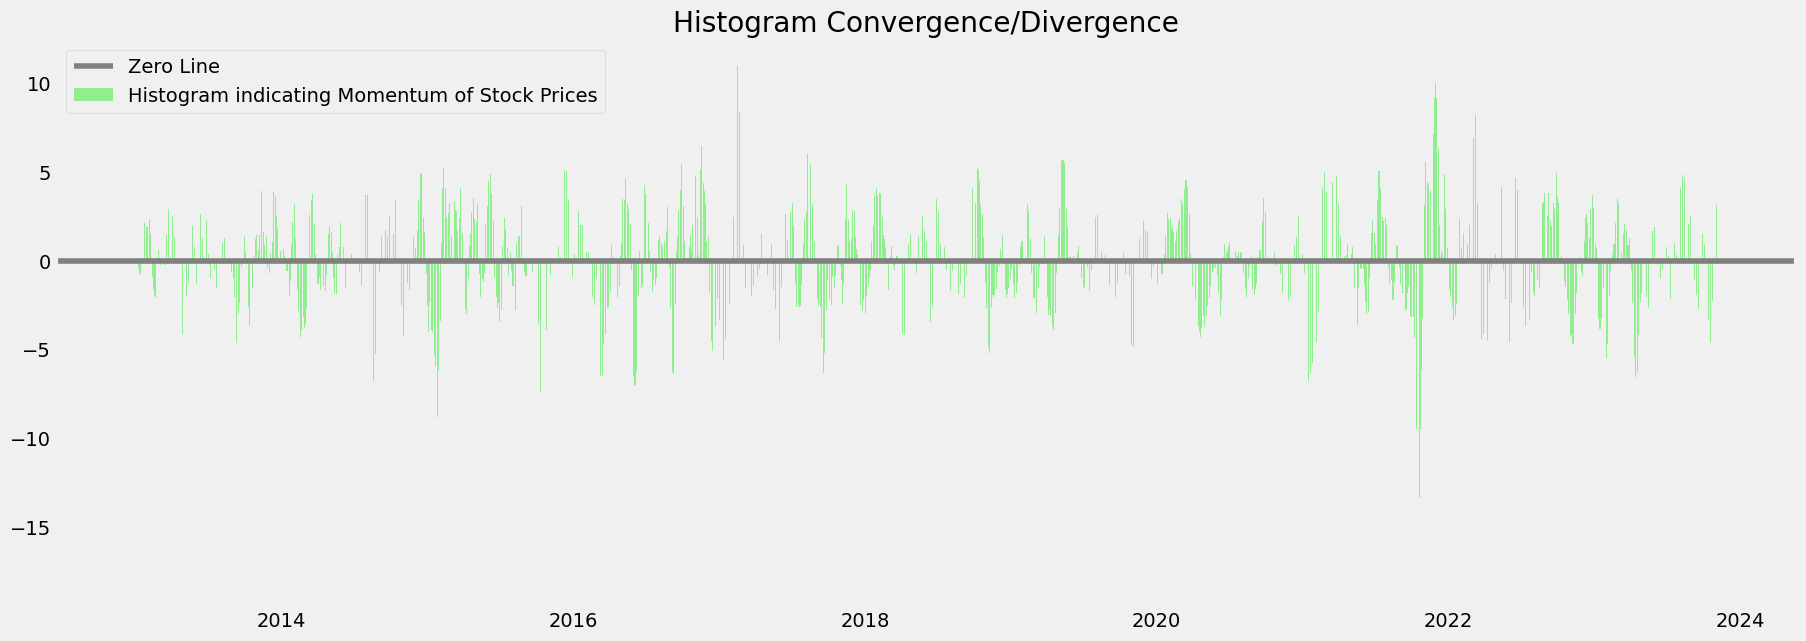

In [ ]:
plt.figure(figsize=(20,7))
df['hist_values']=df['MACD']-df['signal']
plt.bar(df['hist_values'].index,df['hist_values'],label="Histogram indicating Momentum of Stock Prices",color="lightgreen")
plt.axhline(y=0,color="grey",label="Zero Line")
plt.legend()
plt.title("Histogram Convergence/Divergence")
plt.grid(False)
plt.show()

In [ ]:
df['signal']

Date
2013-01-01    0.000000
2013-01-02   -0.015192
2013-01-03   -0.024486
2013-01-04    0.001873
2013-01-07    0.056402
                ...   
2023-10-30   -7.141362
2023-10-31   -6.282008
2023-11-01   -5.358472
2023-11-02   -4.570509
2023-11-03   -4.074707
Name: signal, Length: 2676, dtype: float64

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Adj_Close,SMA,EMA9,EMA26,EMA12,MACD,signal,hist_values
Date,,,,,,,,,,,,,,
2013-01-01,312.646545,314.922150,311.162476,313.388580,308.856659,3980484,308.856659,NaN,308.856659,308.856659,308.856659,0.000000,0.000000,0.000000
2013-01-02,315.120026,317.544037,312.893890,314.625336,310.075531,6929285,310.075531,NaN,309.533810,309.489535,309.516881,-0.027346,-0.015192,-0.012154
2013-01-03,316.604095,318.335541,313.784363,314.724274,310.173065,6165017,310.173065,NaN,309.795800,309.735121,309.772990,-0.037869,-0.024486,-0.013383
2013-01-04,315.120026,315.120026,309.876282,312.052917,307.540344,8965650,307.540344,NaN,309.031757,309.121557,309.068231,0.053326,0.001873,0.051453
2013-01-07,314.427460,315.218964,309.282623,309.925751,305.443939,4943021,305.443939,NaN,307.964462,308.268702,308.083524,0.185178,0.056402,0.128776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,643.799988,643.799988,621.849976,628.500000,628.500000,12786883,628.500000,648.611104,641.460426,637.678206,641.891137,-4.212931,-7.141362,2.928431
2023-10-31,642.000000,642.000000,627.299988,628.650024,628.650024,11395766,628.650024,645.605550,638.898345,637.009452,639.854043,-2.844591,-6.282008,3.437417
2023-11-01,630.000000,633.799988,626.299988,627.700012,627.700012,8785264,627.700012,641.072218,636.658679,636.319864,637.984192,-1.664328,-5.358472,3.694144


Finding the dates when the stock when Bullish and Bearish

<ipython-input-32-8ede3c5898f8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bearish'].iloc[i]=df['signal'][i]
<ipython-input-32-8ede3c5898f8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bullish'].iloc[i]=0
<ipython-input-32-8ede3c5898f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bullish'][i]=df['signal'][i]
<ipython-input-32-8ede3c5898f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

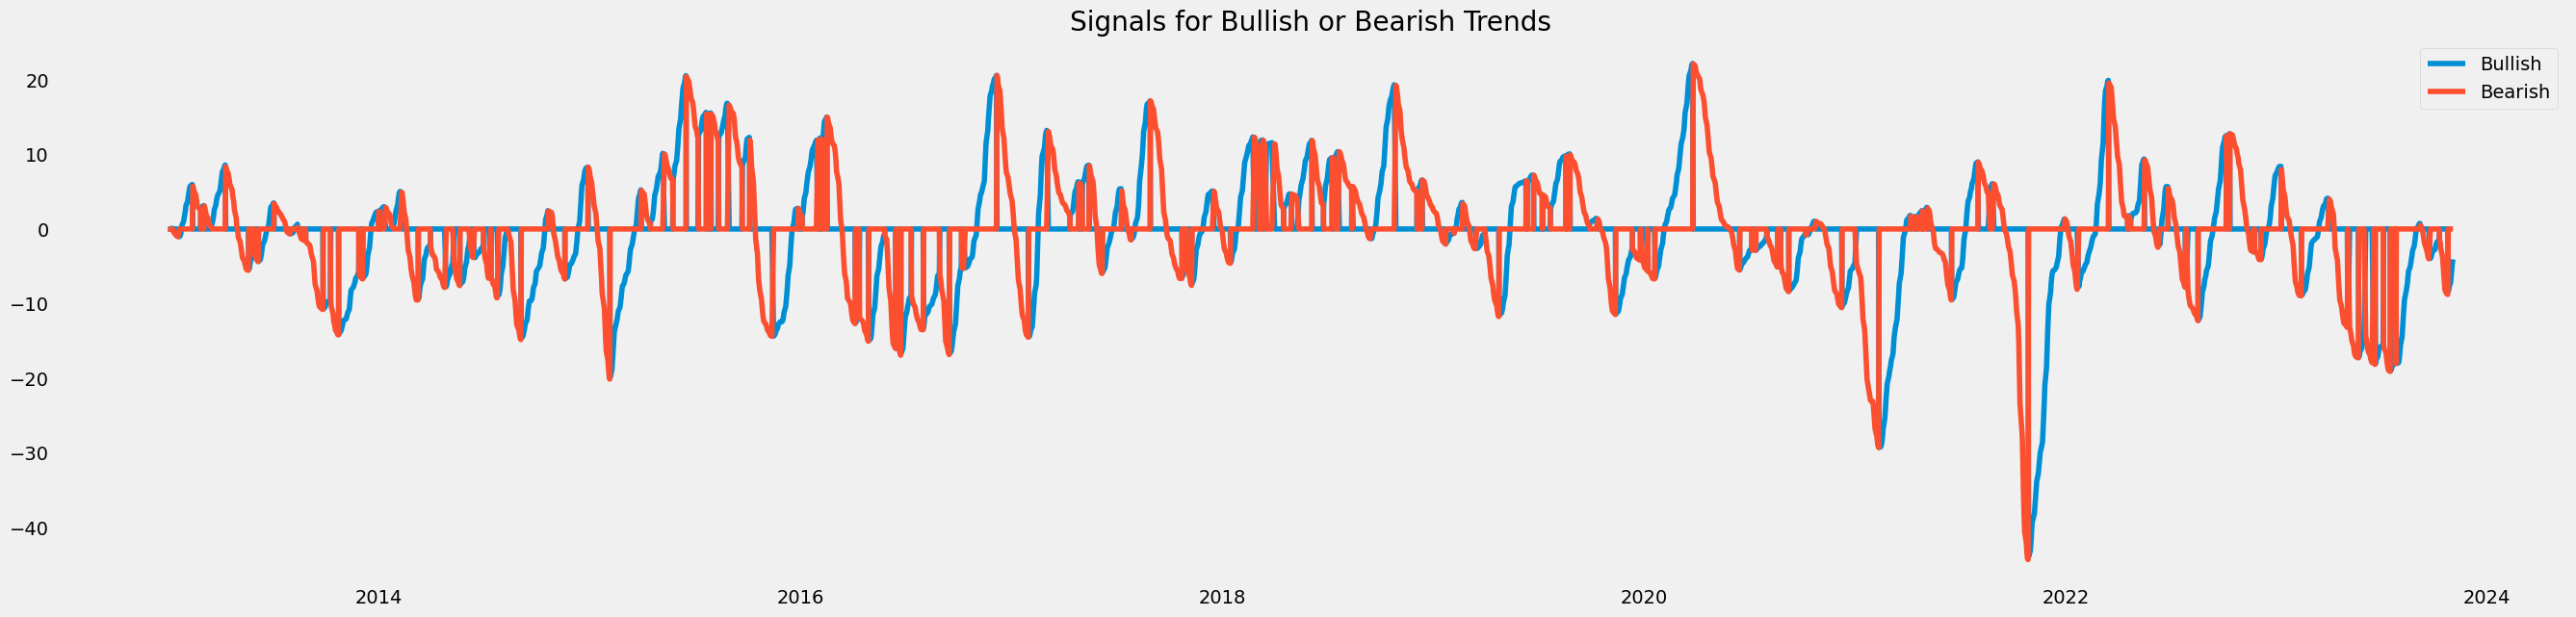

In [ ]:

plt.figure(figsize=(30,7))
plt.grid(False)
for i in range(len(df['MACD'])):
  if (df['MACD'][i]>df['signal'][i]):
       df['Bullish'][i]=df['signal'][i]
       df['Bearish'][i]=0
  else:
    df['Bearish'].iloc[i]=df['signal'][i]
    df['Bullish'].iloc[i]=0
#plt.plot(df['MACD'],label="MACD Line")

#for i in range (len(df['Bullish'])):
#  if (df['Bullish'][i]!=0):
 #    plt.scatter(df['Bullish'].index[i],df['Bullish'][i],marker="o",edgecolor="green",facecolor=None,s=80)
#for i in range (len(df['Bearish'])):
 # if (df['Bearish'][i]!=0):
  #   plt.scatter(df['Bearish'].index[i],df['Bearish'][i],marker="x",edgecolor="red",facecolor=None,s=80)
#plt.plot(df['signal'],label="Signal Line")
plt.legend()
plt.plot(df['Bullish'],label="Bullish")
plt.plot(df['Bearish'],label="Bearish")
plt.legend()
plt.title("Signals for Bullish or Bearish Trends")
points1=[]
points2=[]
date=[]
for i in range(len(df['Bullish'])):
  if (df['Bullish'].iloc[i]!=0 ):
    points1.append(df['Bullish'][i])
    date.append(df['Bullish'].index[i])
  else:
    points2.append(df['Bearish'][i])
    date.append(df['Bearish'].index[i])
plt.show()

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Adj_Close,SMA,EMA9,EMA26,EMA12,MACD,signal,hist_values,Bearish,Bullish
Date,,,,,,,,,,,,,,,,
2013-01-01,312.646545,314.922150,311.162476,313.388580,308.856659,3980484,308.856659,NaN,308.856659,308.856659,308.856659,0.000000,0.000000,0.000000,0.000000,0.000000
2013-01-02,315.120026,317.544037,312.893890,314.625336,310.075531,6929285,310.075531,NaN,309.533810,309.489535,309.516881,-0.027346,-0.015192,-0.012154,-0.015192,0.000000
2013-01-03,316.604095,318.335541,313.784363,314.724274,310.173065,6165017,310.173065,NaN,309.795800,309.735121,309.772990,-0.037869,-0.024486,-0.013383,-0.024486,0.000000
2013-01-04,315.120026,315.120026,309.876282,312.052917,307.540344,8965650,307.540344,NaN,309.031757,309.121557,309.068231,0.053326,0.001873,0.051453,0.000000,0.001873
2013-01-07,314.427460,315.218964,309.282623,309.925751,305.443939,4943021,305.443939,NaN,307.964462,308.268702,308.083524,0.185178,0.056402,0.128776,0.000000,0.056402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,643.799988,643.799988,621.849976,628.500000,628.500000,12786883,628.500000,648.611104,641.460426,637.678206,641.891137,-4.212931,-7.141362,2.928431,0.000000,-7.141362
2023-10-31,642.000000,642.000000,627.299988,628.650024,628.650024,11395766,628.650024,645.605550,638.898345,637.009452,639.854043,-2.844591,-6.282008,3.437417,0.000000,-6.282008
2023-11-01,630.000000,633.799988,626.299988,627.700012,627.700012,8785264,627.700012,641.072218,636.658679,636.319864,637.984192,-1.664328,-5.358472,3.694144,0.000000,-5.358472


Finding buy and sell points

In [ ]:
position=['buy','sell','hold']

In [ ]:
buy_signal=[] #MACD line above signal line
sell_signal=[] #MACD line below signal line

def points(df):
  for index in range(2,len(df)):
    if(df['MACD'].iloc[index]>df['signal'].iloc[index] and df['MACD'].iloc[index-1]< df['signal'].iloc[index-1]):
      buy_signal.append(index)
    elif (df['MACD'].iloc[index]<df['signal'].iloc[index] and df['MACD'].iloc[index-1]>df['signal'].iloc[index-1]):
      sell_signal.append(index)
points(df)

I need to plot the signals

In [ ]:
df.iloc[buy_signal].index

DatetimeIndex(['2013-01-04', '2013-01-21', '2013-02-27', '2013-03-18',
               '2013-05-21', '2013-06-07', '2013-08-01', '2013-08-22',
               '2013-08-27', '2013-09-27',
               ...
               '2022-12-06', '2023-02-14', '2023-05-05', '2023-05-24',
               '2023-06-19', '2023-06-22', '2023-07-18', '2023-07-28',
               '2023-09-25', '2023-10-26'],
              dtype='datetime64[ns]', name='Date', length=101, freq=None)

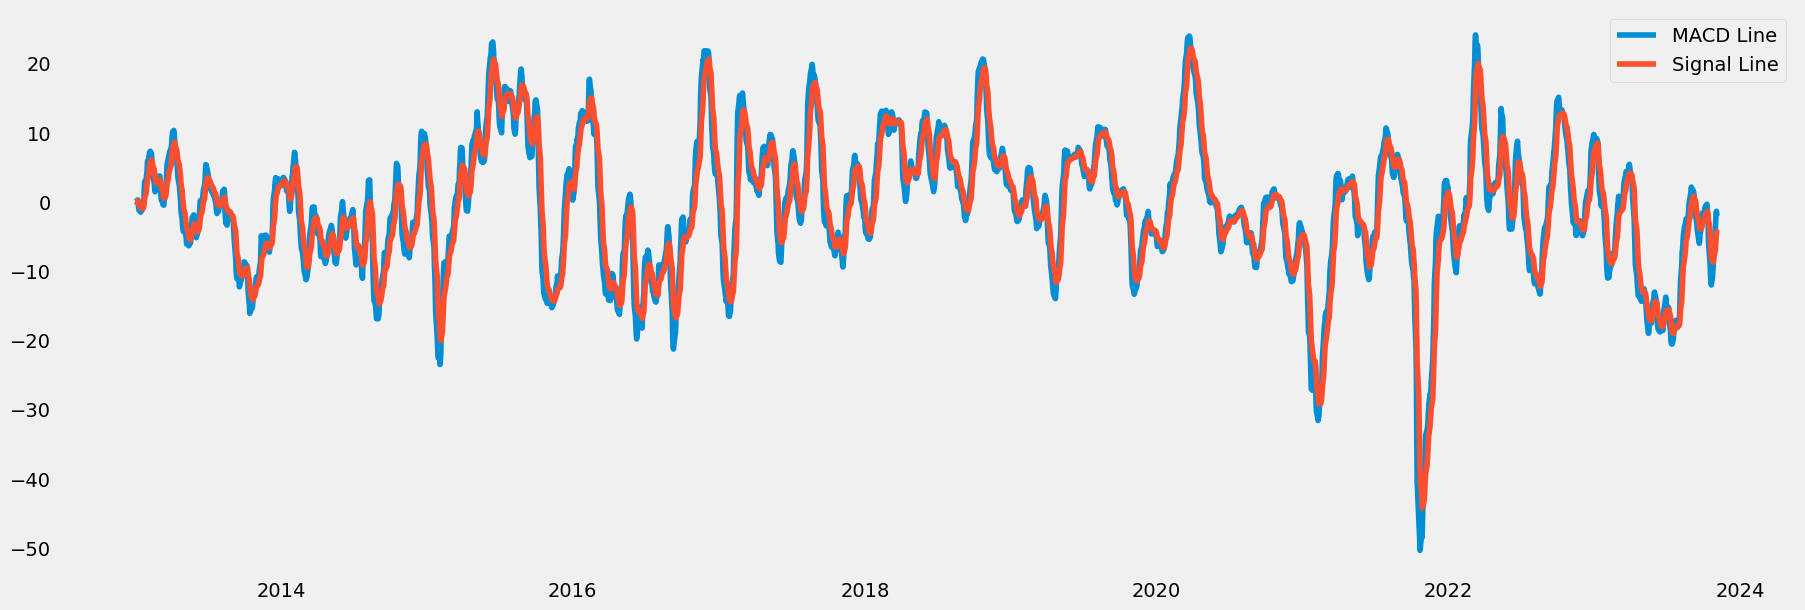

In [ ]:
plt.figure(figsize=(20,7))
plt.grid(False)
plt.plot(df['MACD'],label="MACD Line")
plt.plot(df['signal'],label="Signal Line")
plt.legend()
plt.show()

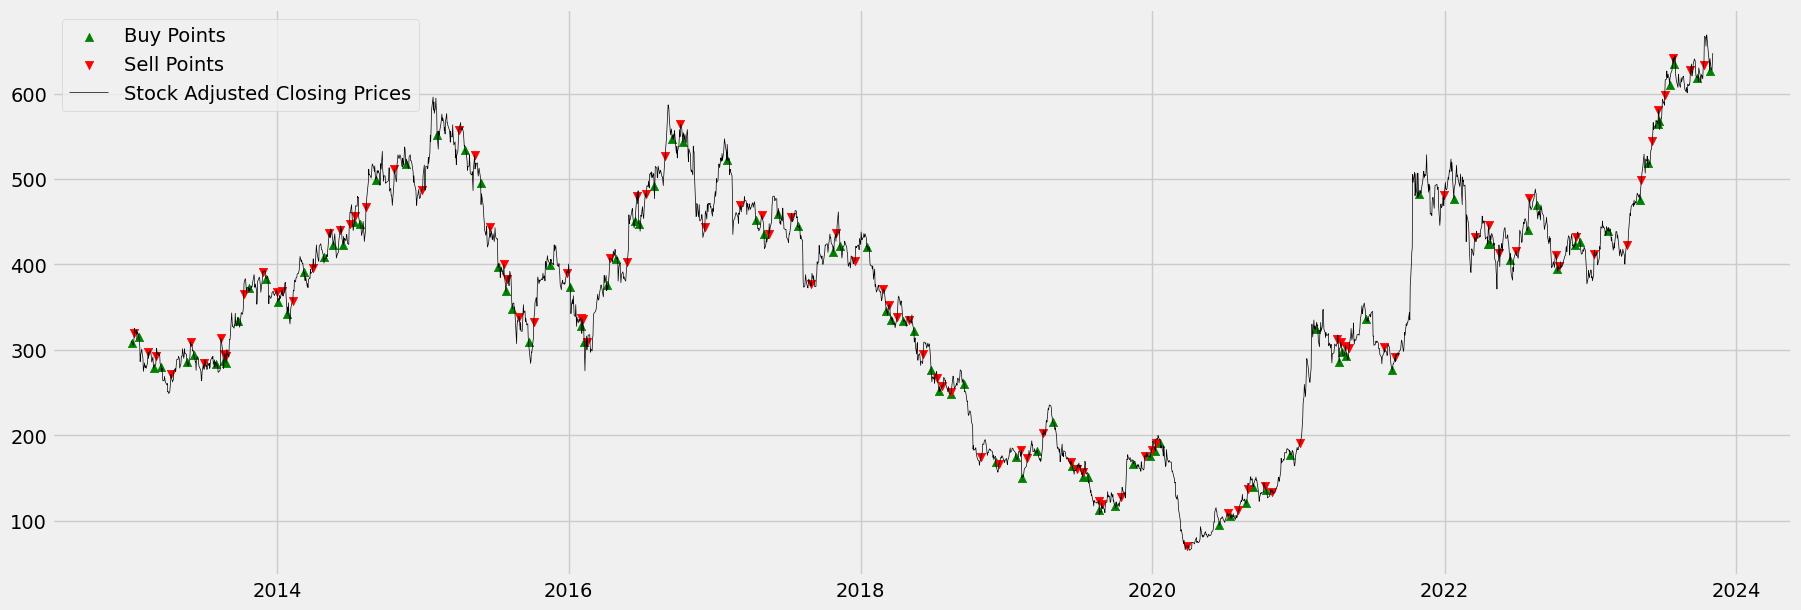

In [ ]:
plt.figure(figsize=(20,7))
plt.scatter(df.iloc[buy_signal].index,df['Adj Close'].iloc[buy_signal],marker="^",color="green",label="Buy Points")
plt.scatter(df.iloc[sell_signal].index,df['Adj Close'].iloc[sell_signal],marker="v",color="red",label="Sell Points")
plt.plot(df['Adj Close'],color="black",label="Stock Adjusted Closing Prices",linewidth=0.5)
plt.legend()
plt.show()

Backtesting

We will not buy on that same day or same moment, after getting signal we expect some delay so profits vary
Real profits will be diff than the actual plot point profits

In [ ]:
Real_buy_points=[i+1 for i in buy_signal]
Real_sell_points=[i+1 for i in sell_signal]

In [ ]:
#def prices_sell_buy(df):
real_sell_price=df['Open'].iloc[Real_sell_points]
real_buy_price=df['Open'].iloc[Real_buy_points]
#prices_sell_buy(df)
real_sell_price

Date
2013-01-10    327.982056
2013-02-14    301.763275
2013-03-06    299.883453
2013-04-12    271.834320
2013-05-31    312.893890
                 ...    
2023-06-21    584.950012
2023-07-07    600.000000
2023-07-28    646.000000
2023-09-11    634.650024
2023-10-12    637.000000
Name: Open, Length: 100, dtype: float64

The problem here is that we have sell point before a buy point so we cannot detect profit for that, assuming the trade consists of sell first buy after, we need to remove this anamoly

In [ ]:
if real_sell_price.index[0]<real_buy_price.index[0]:
  real_sell_price=real_sell_price.drop(real_sell_price.index[0])
elif real_buy_price.index[-1]>real_sell_price.index[-1]:
  real_buy_price=real_buy_price.drop(real_buy_price.index[-1])

In [ ]:
real_sell_price

Date
2013-01-10    327.982056
2013-02-14    301.763275
2013-03-06    299.883453
2013-04-12    271.834320
2013-05-31    312.893890
                 ...    
2023-06-21    584.950012
2023-07-07    600.000000
2023-07-28    646.000000
2023-09-11    634.650024
2023-10-12    637.000000
Name: Open, Length: 100, dtype: float64

In [ ]:
real_sell_price

Date
2013-01-10    327.982056
2013-02-14    301.763275
2013-03-06    299.883453
2013-04-12    271.834320
2013-05-31    312.893890
                 ...    
2023-06-21    584.950012
2023-07-07    600.000000
2023-07-28    646.000000
2023-09-11    634.650024
2023-10-12    637.000000
Name: Open, Length: 100, dtype: float64

plotting real_buy and real_sell points

In [ ]:
from datetime import date
#NS means stock data of tatamotors listed on NSE
stocksymbol=['TATAMOTORS.NS']
startdate='2013-01-01'
end=date.today()
def myportfolio(stock,start=startdate,end=end):
  stockdf=web.get_data_yahoo(stock,start=start,end=end,interval='1d')
  return stockdf

In [ ]:
s=myportfolio(stocksymbol)


[*********************100%%**********************]  1 of 1 completed


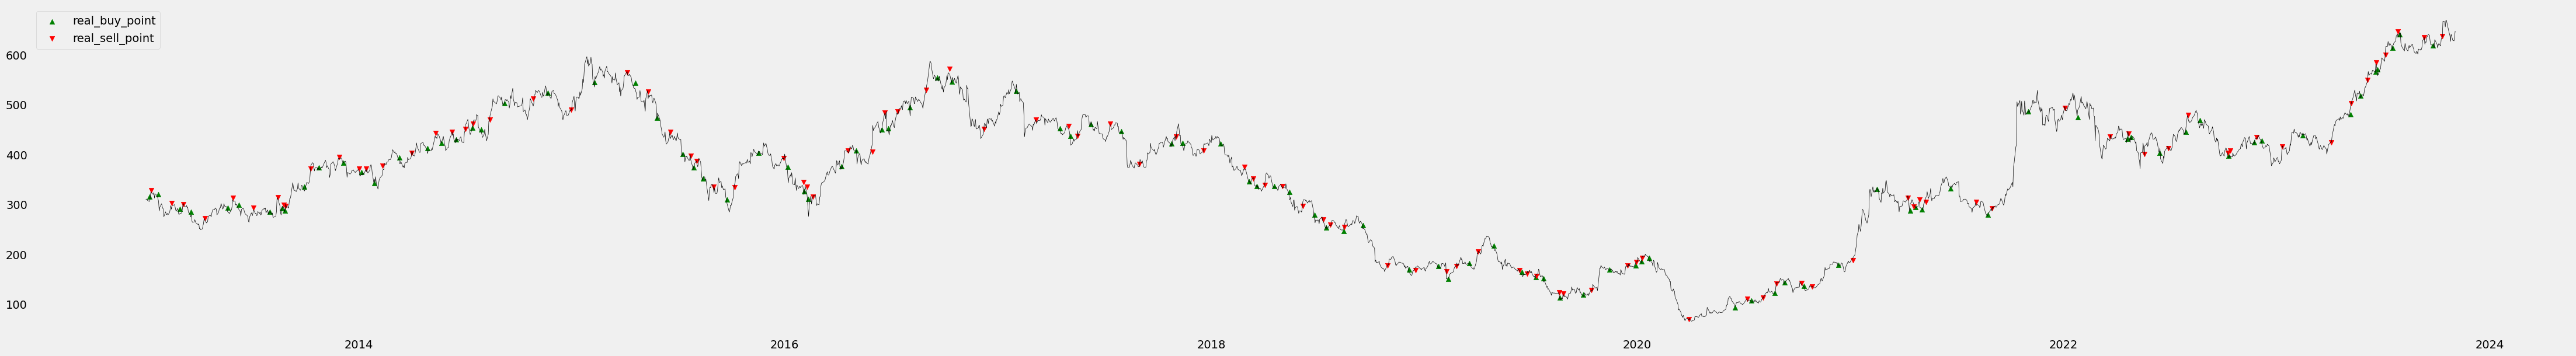

In [ ]:
opening_trade=0
closing_trade=0
plt.figure(figsize=(50,7))
plt.grid(False)
plt.scatter(real_buy_price.index,real_buy_price,color="green",marker="^",label="real_buy_point")
for i in range(len(real_buy_price)):
    #plt.text(real_buy_price.index[i],real_buy_price[i],"Open")
    opening_trade+=1
for i in range(len(real_sell_price)):
    #plt.text(real_sell_price.index[i],real_sell_price[i],"Close")
    closing_trade+=1
plt.scatter(real_sell_price.index,real_sell_price,color="red",marker="v",label="real_sell_point")
plt.plot(s['Adj Close'],color="black",linewidth=0.5)
plt.legend()
plt.show()

Calculating profit

In [ ]:
profit=[]
profit_rel=[]
i=0
for price_buy in real_buy_price:
  price_sell=real_sell_price[i]
  profit.append(price_sell-price_buy)
  profit_rel.append((price_sell-price_buy)*100/price_buy)
  i+=1

profit
profit_rel


[4.310881740250733,
 -5.704129365336767,
 3.358913484995279,
 -4.633802616346389,
 6.8051309012766,
 -1.8404863420615243,
 10.319669224250529,
 2.2033825468212647,
 3.258064872894081,
 10.913934400056927,
 5.5276429462967345,
 -3.1136939360901454,
 2.068027334212602,
 10.28943327500625,
 2.44271340448661,
 7.499097931867482,
 5.370305651515093,
 4.998850687828695,
 1.7348604497507638,
 4.252747129084527,
 1.7716575593224126,
 -6.442148241381982,
 3.6269798505356694,
 -3.2127425983007023,
 -6.081084868958385,
 -0.6745814383588382,
 3.3297706366045254,
 -4.69483551768387,
 7.814007341167196,
 -2.729528535980149,
 -8.136275806821978,
 2.887428894649623,
 1.7105011097524763,
 8.43196719248843,
 -0.7721594116447504,
 7.627304172092805,
 7.558659879758848,
 6.976744186046512,
 3.123869298356889,
 -17.362635126917354,
 -10.995260663507109,
 1.0177004653795632,
 0.0,
 0.22828302317690402,
 -14.83473662902661,
 3.4916893603399646,
 -3.6997621504691196,
 -11.14796568032328,
 1.7391304347826086,


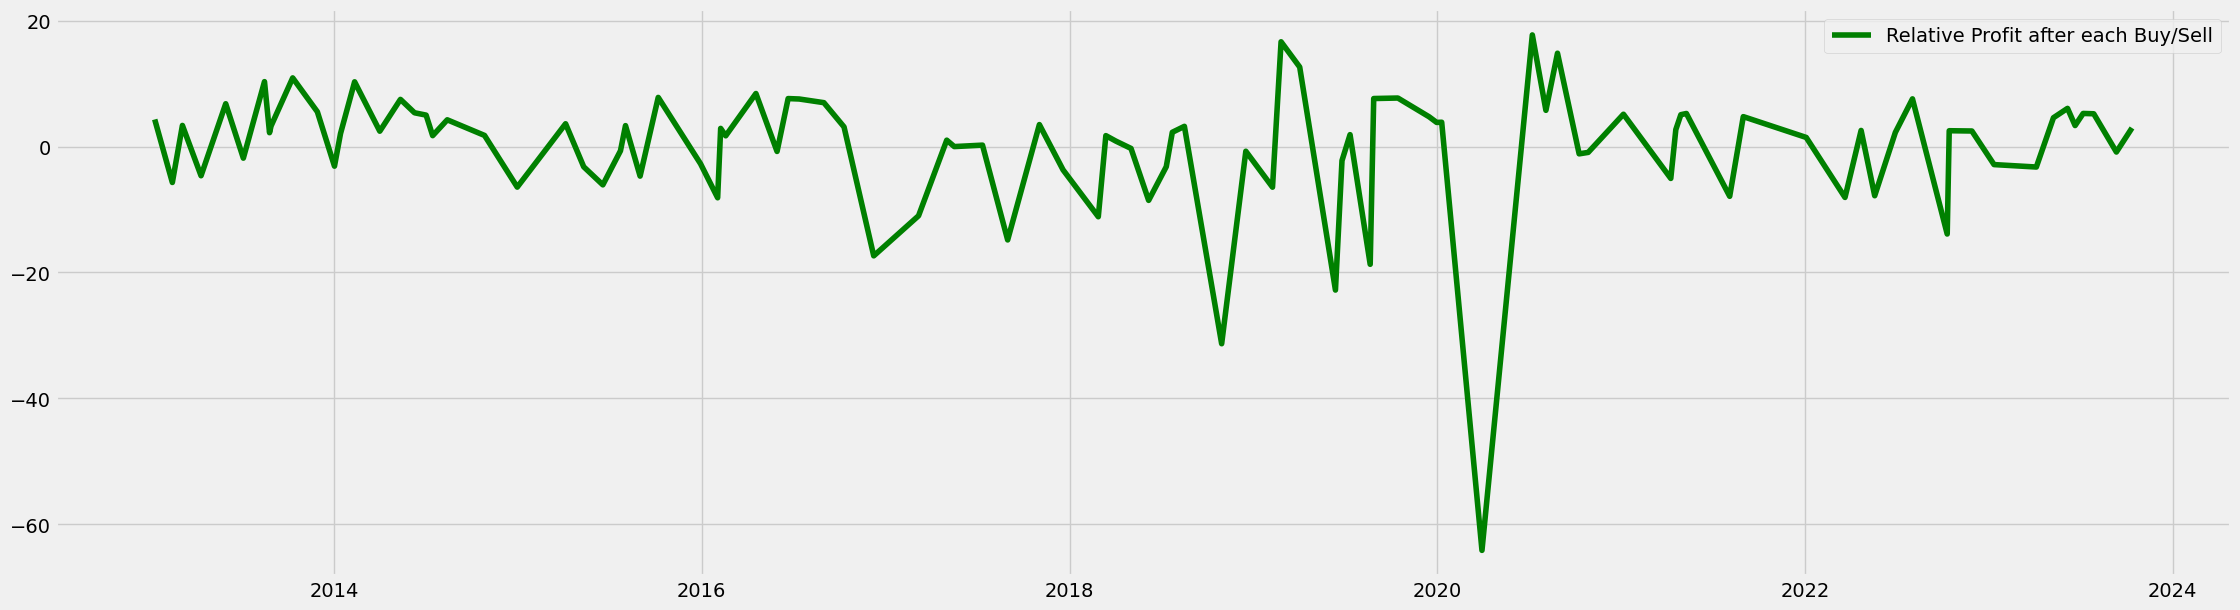

In [ ]:
plt.figure(figsize=(25,7))
plt.plot(real_sell_price.index,profit_rel,color="green",label="Relative Profit after each Buy/Sell")
plt.legend()
plt.show()

Growth of Investment?

In [ ]:
growth=[]
initial_inv=real_buy_price[0]
for i in range (len(real_sell_price)):
  growth.append(real_sell_price[i]-real_buy_price[i])
  #growth_date.append(real_sell_price.index(i))
growth
growth_df=pd.DataFrame(growth)

In [ ]:
growth_df

,0
0,13.554596
1,-18.254211
2,9.745483
3,-13.208313
4,19.936157
...,...
95,18.900024
96,30.000000
97,32.000000
98,-5.549988


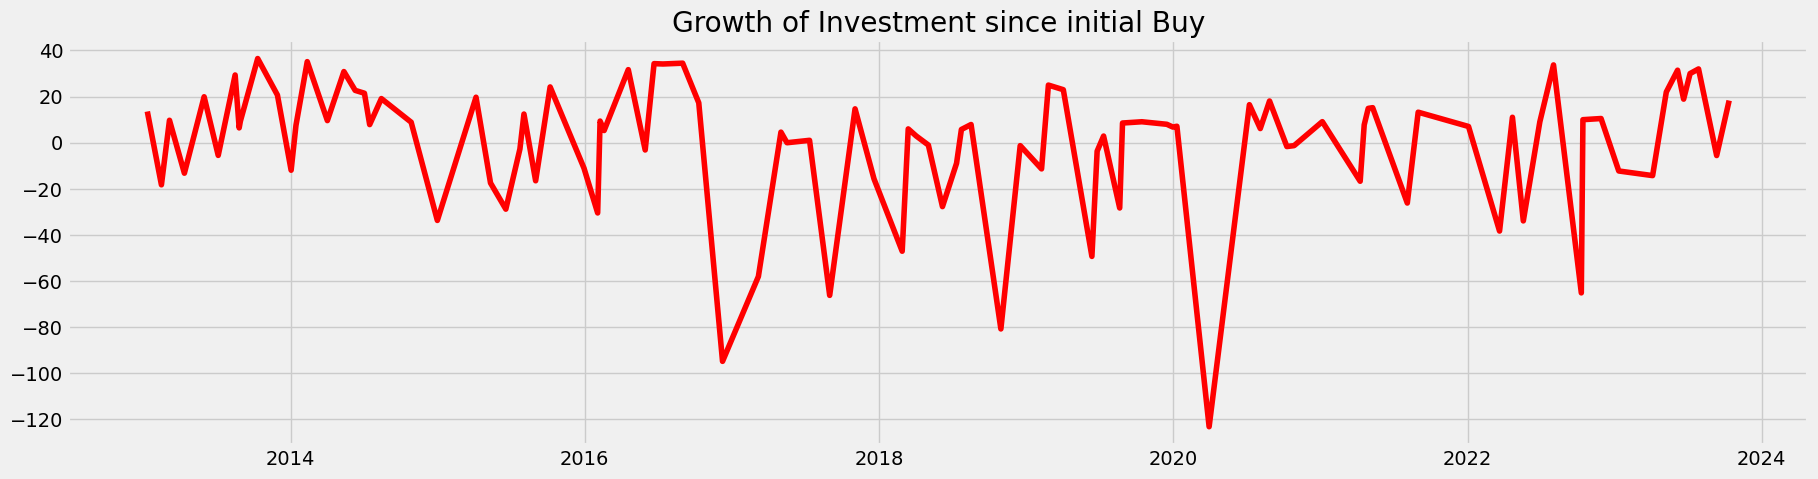

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Growth of Investment since initial Buy")
plt.plot(real_sell_price.index,growth_df,color="red")
plt.show()

Average profit per buy sell?

In [ ]:
avg_profit=sum(profit_rel)/len(profit_rel)
avg_profit*18

0.5717032774947524

Calculating total profit since first buy

In [ ]:
total_return=real_sell_price[-1]-real_buy_price[0]
total_return
#Percentage of profit
percentage_return=total_return*100/real_buy_price[0]
print("The percentage profit or loss using MACD Stratergy will be ", percentage_return,"%")

The percentage profit or loss using MACD Stratergy will be  102.59044823048932 %


In [ ]:
final_money=real_buy_price[0]+percentage_return*real_buy_price[0]/100
total_return

322.5725402832031

Annualised Return

In [ ]:
import math
days=len(df)
annualized_ret = (math.pow((1 + total_return),(365 / days)) - 1)/real_buy_price[0]
print("The annualized return for the stratergy is ", annualized_ret)

The annualized return for the stratergy is  0.003815356260575524


Number od trades executed in the stratergy

In [ ]:
print("The number of trade executed is ", opening_trade)

The number of trade executed is  100


Maximum Drawdown?

In [ ]:
max_drawdown=[]
drawdown=[]
max_each_day=[]
loc_max_each_day=[]
for i in range (len(df)):
  for j in range (len(df)):
    drawdown.append(df['Adj Close'].iloc[i]-df['Adj Close'].iloc[j])

  draw=[abs(ele) for ele in drawdown]
  max_value=np.max(draw)
  loc_max=draw.index(max_value)
  max_each_day.append(max_value)
  loc_max_each_day.append(loc_max)

max_drawdown=np.max(max_each_day)
max_drawdown_loc=max_each_day.index(max_drawdown)

In [ ]:
max_drawdown
max_drawdown_loc
peak_value=df['Adj Close'].max()
peak_index=df['Adj Close'].argmax()
low_index=df['Adj Close'].argmin()
low_value=df['Adj Close'].min()
#peak_date=df.iloc(peak_row)

In [ ]:
max_drawdown

603.7028732299805

Plotting Max_drawdown

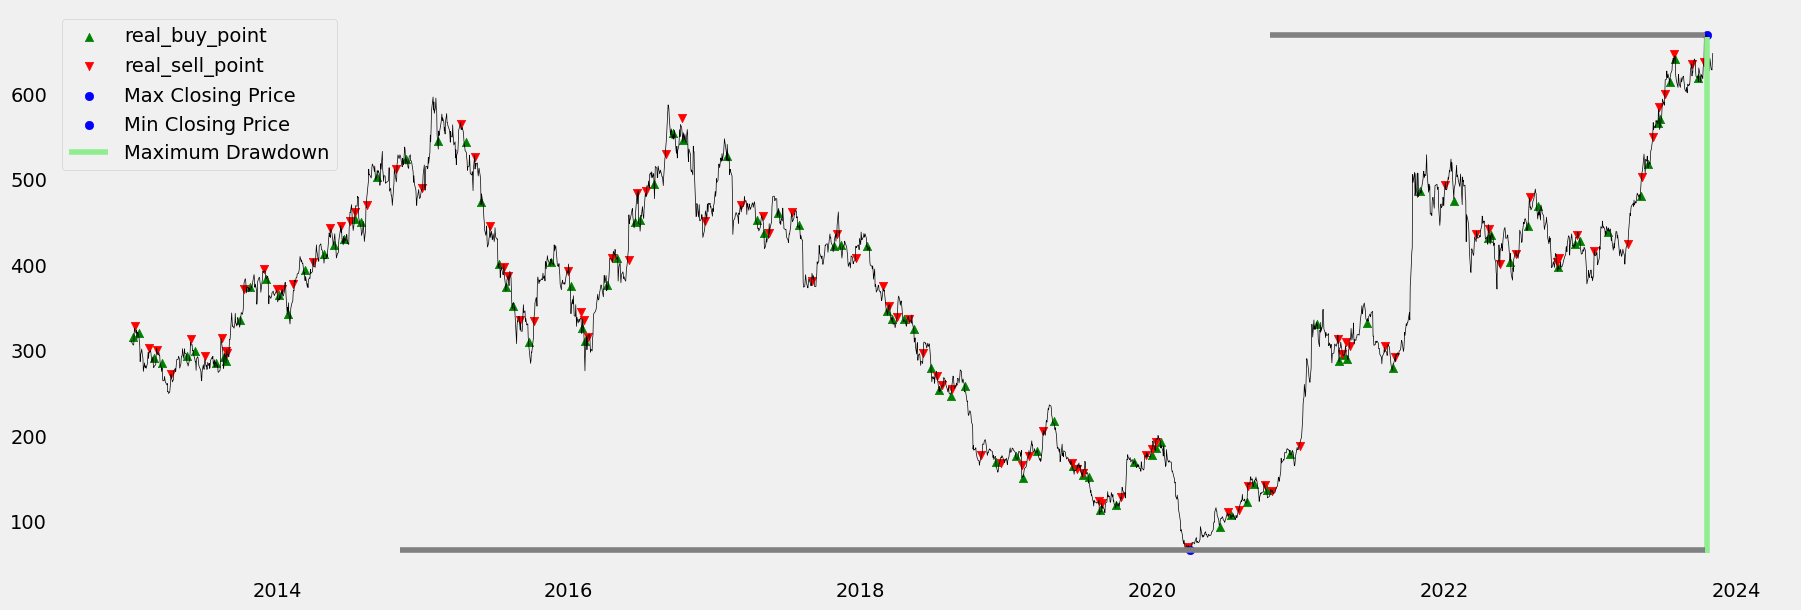

In [ ]:
plt.figure(figsize=(20,7))
plt.grid(False)
plt.scatter(real_buy_price.index,real_buy_price,color="green",marker="^",label="real_buy_point")
plt.scatter(real_sell_price.index,real_sell_price,color="red",marker="v",label="real_sell_point")
plt.plot(df['Adj Close'],color="black",linewidth=0.5)
plt.scatter(df.index[peak_index],peak_value,marker="o",color="blue",label="Max Closing Price")
plt.scatter(df.index[low_index],low_value,marker="o",color="blue",label="Min Closing Price")
#plt.plot([df.index[peak_index],peak_value],[df.index[low_index],low_value])
plt.axvline(df.index[peak_index],color="lightgreen",ymin=0.04,ymax=0.95,label="Maximum Drawdown")
plt.axhline(low_value,color="grey",xmin=0.2,xmax=0.95)
plt.axhline(peak_value,color="grey",xmin=0.7,xmax=0.95)
plt.legend()
plt.show()

Win Ratio

Loss-making trades

In [ ]:
real_buy_price
trade_value=[]
loss_making_trade=[]
buy_date=[]
sell_date=[]
buy_date=real_buy_price.index
sell_date=real_sell_price.index
for i in range(len(real_buy_price)):
  trade_value.append(real_sell_price[i]-real_buy_price[i])
loss_date_buy=[]
loss_date_sell=[]
for i in range(len(trade_value)):
  if(trade_value[i]<0):
    loss_making_trade.append(trade_value[i])
    loss_date_buy.append(buy_date[i])
    loss_date_sell.append(sell_date[i])
np.min(trade_value)
print("Loss making trades are ")
for i in range (len(loss_making_trade)):
    print(" ₹",loss_making_trade[i]," at a buy on ", loss_date_buy[i]," and sell on ",loss_date_sell[i])

Loss making trades are 
 ₹ -18.25421142578125  at a buy on  2013-01-22 00:00:00  and sell on  2013-02-14 00:00:00
 ₹ -13.20831298828125  at a buy on  2013-03-19 00:00:00  and sell on  2013-04-12 00:00:00
 ₹ -5.4910888671875  at a buy on  2013-06-10 00:00:00  and sell on  2013-07-05 00:00:00
 ₹ -11.922119140625  at a buy on  2013-12-06 00:00:00  and sell on  2014-01-02 00:00:00
 ₹ -33.688629150390625  at a buy on  2014-11-21 00:00:00  and sell on  2014-12-31 00:00:00
 ₹ -17.45001220703125  at a buy on  2015-04-20 00:00:00  and sell on  2015-05-12 00:00:00
 ₹ -28.800018310546875  at a buy on  2015-05-27 00:00:00  and sell on  2015-06-19 00:00:00
 ₹ -2.70001220703125  at a buy on  2015-07-10 00:00:00  and sell on  2015-07-24 00:00:00
 ₹ -16.5  at a buy on  2015-08-14 00:00:00  and sell on  2015-09-01 00:00:00
 ₹ -11.0  at a buy on  2015-11-17 00:00:00  and sell on  2015-12-30 00:00:00
 ₹ -30.45001220703125  at a buy on  2016-01-06 00:00:00  and sell on  2016-02-02 00:00:00
 ₹ -3.150024414

Largest Profit making trade

In [ ]:
real_buy_price
trade_value=[]
for i in range(len(real_buy_price)):
  trade_value.append(real_sell_price[i]-real_buy_price[i])
loc_max_trade=trade_value.index(np.max(trade_value))
print("The largest Profit making trade was for ",np.max(trade_value))
print("The buying date was ",buy_date[loc_max_trade] ," and selling date-",sell_date[loc_max_trade])

The largest Profit making trade was for  36.5084228515625
The buying date was  2013-09-30 00:00:00  and selling date- 2013-10-11 00:00:00


Calculating the Sharpe Ratio for the strategy

Finding Risk Free Return Rate for the stock
Since the stock used is TATA Motors which is listed in Indian NSE, we will use Indian factors while calculating

using cpi for adjusting the rate

In [ ]:
from bs4 import BeautifulSoup
soup=BeautifulSoup("https://in.investing.com/economic-calendar/indian-cpi-973",'html.parser')

<ipython-input-61-547209f7be1a>:2: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup=BeautifulSoup("https://in.investing.com/economic-calendar/indian-cpi-973",'html.parser')


In [ ]:
soup.h2

In [ ]:
curr_inflation=5.02 #in percentage
govt_bond_rate=7.366
risk_free_return=(1+govt_bond_rate)/(1+curr_inflation) -1

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Adj_Close,SMA,EMA9,EMA26,EMA12,MACD,signal,hist_values,Bearish,Bullish
Date,,,,,,,,,,,,,,,,
2013-01-01,312.646545,314.922150,311.162476,313.388580,308.856659,3980484,308.856659,NaN,308.856659,308.856659,308.856659,0.000000,0.000000,0.000000,0.000000,0.000000
2013-01-02,315.120026,317.544037,312.893890,314.625336,310.075531,6929285,310.075531,NaN,309.533810,309.489535,309.516881,-0.027346,-0.015192,-0.012154,-0.015192,0.000000
2013-01-03,316.604095,318.335541,313.784363,314.724274,310.173065,6165017,310.173065,NaN,309.795800,309.735121,309.772990,-0.037869,-0.024486,-0.013383,-0.024486,0.000000
2013-01-04,315.120026,315.120026,309.876282,312.052917,307.540344,8965650,307.540344,NaN,309.031757,309.121557,309.068231,0.053326,0.001873,0.051453,0.000000,0.001873
2013-01-07,314.427460,315.218964,309.282623,309.925751,305.443939,4943021,305.443939,NaN,307.964462,308.268702,308.083524,0.185178,0.056402,0.128776,0.000000,0.056402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,643.799988,643.799988,621.849976,628.500000,628.500000,12786883,628.500000,648.611104,641.460426,637.678206,641.891137,-4.212931,-7.141362,2.928431,0.000000,-7.141362
2023-10-31,642.000000,642.000000,627.299988,628.650024,628.650024,11395766,628.650024,645.605550,638.898345,637.009452,639.854043,-2.844591,-6.282008,3.437417,0.000000,-6.282008
2023-11-01,630.000000,633.799988,626.299988,627.700012,627.700012,8785264,627.700012,641.072218,636.658679,636.319864,637.984192,-1.664328,-5.358472,3.694144,0.000000,-5.358472


Expected return from portfolio (one stock considered here)/share

In [ ]:
import math
std_dev=0
exp_return=total_return
#finding std deviation of portfolio since we have portfolio with 1 stock therefore weight=1.0
mean=df['Adj Close'].mean()
for i in range(len(df['Adj Close'])):
  std_dev=std_dev+math.pow((df['Adj Close'][i]-mean),2)/((len(df['Adj Close'])-1))
std_dev_=math.sqrt(std_dev)

In [ ]:
sharpe_ratio=(exp_return-risk_free_return)/std_dev_

In [ ]:
sharpe_ratio

2.367009559886691

Since the Sharpe ratio is close to 2.0, TATA Motors stock is a decent investment

Sending details to csv file

In [ ]:
! gdown https://drive.google.com/file/d/12tkaN62o8h7HJln7UQMtpvgeGLut16HX/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=12tkaN62o8h7HJln7UQMtpvgeGLut16HX
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/12tkaN62o8h7HJln7UQMtpvgeGLut16HX/view?usp=sharing
To: /content/view?usp=sharing
84.0kB [00:00, 56.5MB/s]


In [ ]:
import pandas as pd
df1=pd.DataFrame(
    {

        'Buy Price':[i for i in real_buy_price],
        'Buy Dates':[j for j in real_buy_price.index],
        'Sell Price':[k for k in real_sell_price],
        'Sell Dates':[l for l in real_sell_price.index],
        }
)
df2=pd.DataFrame({
    'Largest Profit Making Trade':[np.max(trade_value)],
    'Loss-making trades': "₹ -5.899993896484375  at a buy on  2023-02-14 00:00:00  and sell on  2023-03-13 00:00:00 ₹ -5.54998779296875 at a buy on 2023-07-31 00:00:00  and sell on  2023-09-11 00:00:00",
    'Largest Loss-making trade':'₹ -5.899993896484375',
    'Maximum Drawdown':max_drawdown,
    'Annualised Return':annualized_ret,
    'Average profit/trade':avg_profit,
})

In [ ]:
df=pd.concat([df1,df2])

Converting DataFrame to csv

In [ ]:
csv_file=df.to_csv('summary.csv')

In [ ]:
csv=pd.read_csv('/content/summary.csv')
csv

,Unnamed: 0,Buy Price,Buy Dates,Sell Price,Sell Dates,Largest Profit Making Trade,Loss-making trades,Largest Loss-making trade,Maximum Drawdown,Annualised Return,Average profit/trade
0,0,314.427460,2013-01-07,327.982056,2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN
1,1,320.017487,2013-01-22,301.763275,2013-02-14,NaN,NaN,NaN,NaN,NaN,NaN
2,2,290.137970,2013-02-28,299.883453,2013-03-06,NaN,NaN,NaN,NaN,NaN,NaN
3,3,285.042633,2013-03-19,271.834320,2013-04-12,NaN,NaN,NaN,NaN,NaN,NaN
4,4,292.957733,2013-05-22,312.893890,2013-05-31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
96,96,570.000000,2023-06-23,600.000000,2023-07-07,NaN,NaN,NaN,NaN,NaN,NaN
97,97,614.000000,2023-07-19,646.000000,2023-07-28,NaN,NaN,NaN,NaN,NaN,NaN
98,98,640.200012,2023-07-31,634.650024,2023-09-11,NaN,NaN,NaN,NaN,NaN,NaN
99,99,618.700012,2023-09-26,637.000000,2023-10-12,NaN,NaN,NaN,NaN,NaN,NaN
